### Day3-2 作業  

* 讀取 txt 檔, 請讀取 text file  
https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt 
* 將所提供的 txt 轉成 pandas dataframe  
* 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片
  

**Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料**  
**Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)**  
**Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)**


In [1]:
import pandas as pd
import requests

# 紀錄連結
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

# 使用 get 方式下載網頁
response = requests.get(target_url)

# 取得網頁 HTML 原始碼
data = response.text

print(data)


n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
n00015388_442	http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
n00015388_514	http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
n00015388_671	http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
n00015388_686	http://farm1.static.flic

In [2]:
# 用 request 傳送回來的資料不會認斷行符號
print(len(data))

784594


In [3]:
data[0:100]

'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [4]:
# 找到斷行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))

9996


In [5]:
print(data[0])
print(data[1])
print(data[3])

n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg


**將 txt 轉成 DataFrame 的格式**  
**[List](http://www.runoob.com/python/python-lists.html) 可使用的函數**

In [6]:
arrange_data = []

for i in range(len(data)):
    arrange_data.append(data[i].split('\t'))

print(arrange_data)

[['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'], ['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'], ['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'], ['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'], ['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'], ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'], ['n00015388_379', 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'], ['n00015388_388', 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'], ['n00015388_442', 'http://www.porschemania.it/discus/messages/815/102099.jpg'], ['n00015388_474', 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'], ['n00015388_514', 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg'], ['n00015388_671', 'http:/

In [7]:
df = pd.DataFrame(arrange_data)
df.head() # 顯示前 5 列

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


**讀取 DataFrame 中前 5 張圖片**  
  
    
      
常見的套件:  
* skimage  
* PIL  
* OpenCV  

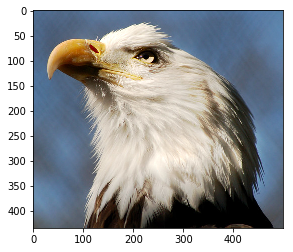

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from io import BytesIO

# 利用 df.loc[...] 取得第一筆資料的連結
first_link = df.loc[0][1]

# 使用 get 方式下載第一筆資料
response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# 顯示第一筆資料圖
plt.imshow(img)
plt.show()

In [15]:
# convert img to numpy array
def img2arr_fromURLs(url_list , resize = False):
    """
    Args
        - url_list：list of URLs
        - resize：bool
    Return
        - list of array
    """
    
    img_list = []
    
    for i in url_list:
        response = requests.get(i)
        try:
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content)) 
                img_list.append(img)
            else:
                raise EOFError
        except EOFError: # 處理無法抓到照片
            print('Something Error! \n',
                  'URL：',i,'\n',
                  'status_code：',response.status_code)
    
    
    return img_list

Something Error! 
 URL： http://img100.imageshack.us/img100/3253/forrest004fs9.jpg 
 status_code： 404
Total images that we got：%i  4


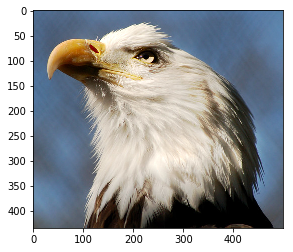

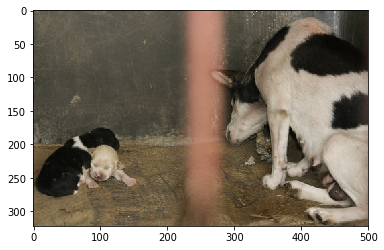

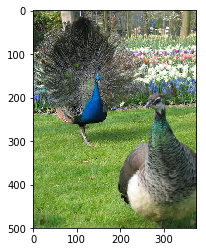

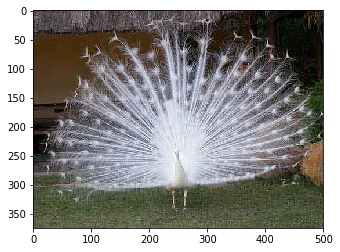

In [16]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got：%i ",len(result)) # 若不等於 5，代表有連結失效

for img_get in result:
    plt.imshow(img_get)
    plt.show()